In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')
import helper.model_builder
import helper.metrics

import skimage.io

import numpy as np

import time

import keras

# build session running on a specific GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "0"
session = tf.Session(config = configuration)

keras.backend.set_session(session)

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
test_img_path_patch = '/home/jr0th/github/segmentation/data/BBBC022/test/x/all/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637_0_0.png'
test_img_path_full = '/home/jr0th/github/segmentation/data/BBBC022/test/x_big/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png'

In [6]:
# use latest checkpoint
weights_path = '/home/jr0th/github/segmentation/checkpoints/DL_on_Hand_boundary_4/checkpoint_0000.hdf5'

# get images
patch = skimage.io.imread(test_img_path_patch)
full = skimage.io.imread(test_img_path_full)

dim1_patch = patch.shape[0]
dim2_patch = patch.shape[1]

dim1_full = full.shape[0]
dim2_full = full.shape[1]

patch = patch.reshape((1, dim1_patch, dim2_patch, 1)) / 255
full = full.reshape((1, dim1_full, dim2_full, 1)) / 255

# build model and load weights
model_patch = helper.model_builder.get_model_1_class(dim1_patch, dim2_patch)
model_full = helper.model_builder.get_model_1_class(dim1_full, dim2_full)

model_patch.load_weights(weights_path)
model_full.load_weights(weights_path)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

# Test a patch

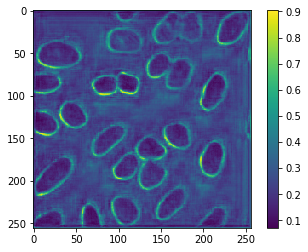

In [7]:
y = model_patch.predict(patch).squeeze()

plt.imshow(y)
plt.colorbar()
plt.show()

# Test a full image

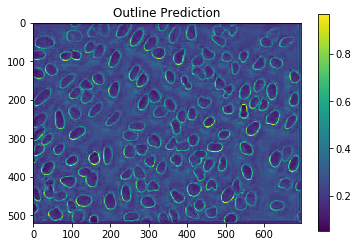

In [8]:
y = model_full.predict(full).squeeze()

plt.imshow(y)
plt.colorbar()

plt.title('Outline Prediction')
plt.savefig('sample_prediction.eps', format='EPS')